# Data analysis

This notebook introduces the use of `Jupyter` notebook and `Python` for data analysis.

In [1]:
%pylab inline
import numpy
import seaborn

Populating the interactive namespace from numpy and matplotlib


/Users/lpritc/Documents/Development/Teaching/Teaching-SWC-Lessons/venv-swc/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
numpy.loadtxt(fname='data/inflammation-01.csv', delimiter=',')

array([[ 0.,  0.,  1., ...,  3.,  0.,  0.],
       [ 0.,  1.,  2., ...,  1.,  0.,  1.],
       [ 0.,  1.,  1., ...,  2.,  1.,  1.],
       ..., 
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  0.,  0., ...,  0.,  2.,  0.],
       [ 0.,  0.,  1., ...,  1.,  1.,  0.]])

In [3]:
data = numpy.loadtxt(fname='data/inflammation-01.csv', delimiter=',')

In [4]:
type(data)

numpy.ndarray

In [5]:
print(data.dtype)

float64


In [6]:
print(data.shape)

(60, 40)


## Indexing arrays

Arrays are indexed by *row* and *column*, using *square bracket* notation:

```python
data[30, 20]  # get entry at row 30, column 20 of the array
```

Counting of array elements starts at 0 (zero), not at 1 (one).

In [7]:
print('first value in data:', data[0, 0])

first value in data: 0.0


In [8]:
print('middle value in data:', data[30, 20])

middle value in data: 13.0


## Slicing arrays

We can select whole sections of arrays by *slicing* them: defining the start and end points of the *slice* in square brackets, separating start and end with `:` (colon)

```python
data[0:4, 0:10]
```

The slice `0:4` means "*start at index 0 and go up to, but not including, index 4*"

In [9]:
print(data[0:4, 0:10])

[[ 0.  0.  1.  3.  1.  2.  4.  7.  8.  3.]
 [ 0.  1.  2.  1.  2.  1.  3.  2.  2.  6.]
 [ 0.  1.  1.  3.  3.  2.  6.  2.  5.  9.]
 [ 0.  0.  2.  0.  4.  2.  2.  1.  6.  7.]]


In [10]:
print(data[5:10, 0:10])

[[ 0.  0.  1.  2.  2.  4.  2.  1.  6.  4.]
 [ 0.  0.  2.  2.  4.  2.  2.  5.  5.  8.]
 [ 0.  0.  1.  2.  3.  1.  2.  3.  5.  3.]
 [ 0.  0.  0.  3.  1.  5.  6.  5.  5.  8.]
 [ 0.  1.  1.  2.  1.  3.  5.  3.  5.  8.]]


If we don't specify a *start* to the slice, `Python` assumes we mean the beginning of the axis (first element, `0` (zero)).

If we don't specify an *end* to the slice, `Python` assumes we mean the end of the axis (last element.

In [11]:
small = data[:3, 36:]
print('small is:')
print(small)

small is:
[[ 2.  3.  0.  0.]
 [ 1.  1.  0.  1.]
 [ 2.  2.  1.  1.]]


# Operations on arrays

Arithmetic operations, such as `+`, `-`, `*`, `/` are performed *elementwise* on arrays.

We can multiply an array by a scalar.

In [12]:
doubledata = data * 2.0

In [13]:
print('original:')
print(data[:3, 36:])
print('doubledata:')
print(doubledata[:3, 36:])

original:
[[ 2.  3.  0.  0.]
 [ 1.  1.  0.  1.]
 [ 2.  2.  1.  1.]]
doubledata:
[[ 4.  6.  0.  0.]
 [ 2.  2.  0.  2.]
 [ 4.  4.  2.  2.]]


Adding two arrays is also performed elementwise.

In [14]:
tripledata = doubledata + data

In [15]:
print('tripledata:')
print(tripledata[:3, 36:])

tripledata:
[[ 6.  9.  0.  0.]
 [ 3.  3.  0.  3.]
 [ 6.  6.  3.  3.]]


`numpy` provides functions that operate on `array`s, e.g. to provide statistical summaries.

In [16]:
print(numpy.mean(data))

6.14875


In [17]:
maxval, minval, stdval = numpy.max(data), numpy.min(data), numpy.std(data)

print('maximum inflammation:', maxval)
print('minimum inflammation:', minval)
print('standard deviation:', stdval)

maximum inflammation: 20.0
minimum inflammation: 0.0
standard deviation: 4.61383319712


The data itself has these operations built-in.

In [18]:
maxval, minval, stdval = data.max(), data.min(), data.std()

print('maximum inflammation:', maxval)
print('minimum inflammation:', minval)
print('standard deviation:', stdval)

maximum inflammation: 20.0
minimum inflammation: 0.0
standard deviation: 4.61383319712


By default, these functions operate on the complete dataset. But what if we want to summarise the data row-by-row, to get a summary for each patient?

We can put the data for a single patient into a new variable, and use its `.mean()` function.

In [19]:
patient_0 = data[0, :] # Row zero only, all columns
print('maximum inflammation for patient 0:', patient_0.max())

maximum inflammation for patient 0: 18.0


We can also operate directly on a row, without assigning it to a variable first.

In [20]:
print('maximum inflammation for patient 0:', numpy.max(data[0, :]))
print('maximum inflammation for patient 2:', numpy.max(data[2, :]))

maximum inflammation for patient 0: 18.0
maximum inflammation for patient 2: 19.0


But what if we want the maximum inflammation for each patient, or the average inflammation per day?

We could write one line per patient, or per day, but this would be tedious and prone to errors and typos.

There is an alternative, which is to specify which axis the `numpy` function works on:

![`numpy` operations across rows and columns](images/python-operations-across-axes.png)

So, to get the maximum inflammation for each patient (row), we could use:

In [21]:
print(numpy.max(data, axis=1))

[ 18.  18.  19.  17.  17.  18.  17.  20.  17.  18.  18.  18.  17.  16.  17.
  18.  19.  19.  17.  19.  19.  16.  17.  15.  17.  17.  18.  17.  20.  17.
  16.  19.  15.  15.  19.  17.  16.  17.  19.  16.  18.  19.  16.  19.  18.
  16.  19.  15.  16.  18.  14.  20.  17.  15.  17.  16.  17.  19.  18.  18.]


Or, for average inflammation per day (column):

In [22]:
print(data.mean(axis=0))

[  0.           0.45         1.11666667   1.75         2.43333333   3.15
   3.8          3.88333333   5.23333333   5.51666667   5.95         5.9
   8.35         7.73333333   8.36666667   9.5          9.58333333
  10.63333333  11.56666667  12.35        13.25        11.96666667
  11.03333333  10.16666667  10.           8.66666667   9.15         7.25
   7.33333333   6.58333333   6.06666667   5.95         5.11666667   3.6
   3.3          3.56666667   2.48333333   1.5          1.13333333
   0.56666667]


## Visualisation

> "The purpose of computing is insight, not numbers" - Richard Hamming

The best way to gain insight is often to visualise data.

There is no "official" `Python` plotting library, but `matplotlib` is essentially the *de facto* standard.

We import `matplotlib` with:

```python
import matplotlib.pyplot
```

We imported `seaborn` right at the start of the notebook, and this modifies `matplotlib`'s output styles, so they are a little more 'publication-ready'. 

We used `%pylab inline` right at the start of the notebook, and this makes `matplotlib` put its output into the notebook.

The `.imshow()` function in `matplotlib.pyplot` renders matrix data as an image:

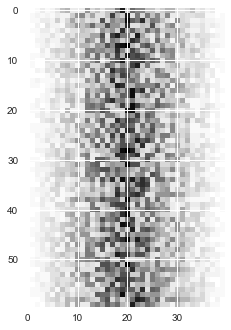

In [23]:
import matplotlib.pyplot
image = matplotlib.pyplot.imshow(data)

The light squares are small values, and the dark squares large values. So we can see that inflammation rises and falls over a 40-day period.

The `.plot()` function in `matplotlib` shows us a more conventional line plot. We can use this to show the average inflammation on each day across all patients.

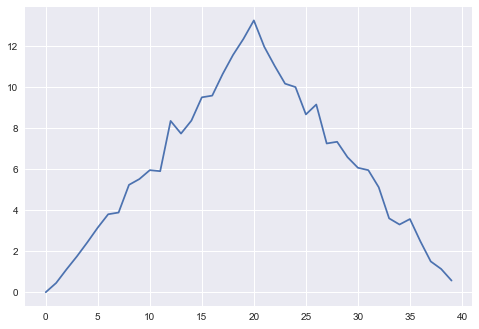

In [24]:
ave_inflammation = numpy.mean(data, axis=0)
ave_plot = matplotlib.pyplot.plot(ave_inflammation)

This is biologically suspicious. Based on other studies, we'd expect a sharp rise and slow fall. This looks like a linear rise and fall. We can look at two other statistics.

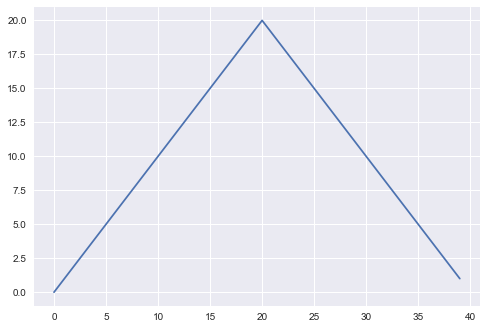

In [25]:
max_plot = matplotlib.pyplot.plot(numpy.max(data, axis=0))

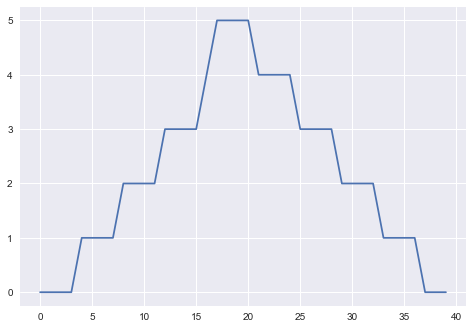

In [26]:
min_plot = matplotlib.pyplot.plot(numpy.min(data, axis=0))

The maximum value each day rises and falls perfectly smoothly. The minimum value appears to be a step function. Both of these datasets appear to be quite artifical, compared with the biological expectation.

It would have been difficult to reach this insight without examining graphs of the data.

### Subplots

We can group plots in a single figure using *subplots*.

To do this, we first create a *figure* in the variable `fig`, using `matplotlib.pyplot.figure()`.

Using the *figure*'s `add_subplot()` function, we add three *subplots* to the *figure* in `fig`, putting these into the variables `axes1`, `axes2`, and `axes3`.

For each of the *subplots* in turn, we label the $y$-axis with something meaningful, and use its `.plot()` function to show the values in the `data` array.

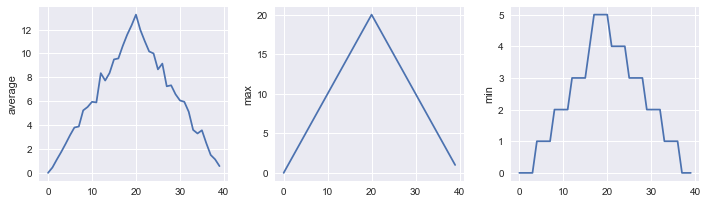

In [27]:
fig = matplotlib.pyplot.figure(figsize=(10.0, 3.0))

axes1 = fig.add_subplot(1, 3, 1)                     # Add three subplots
axes2 = fig.add_subplot(1, 3, 2)
axes3 = fig.add_subplot(1, 3, 3)

axes1.set_ylabel('average')                          # Label and plot the graphs
axes1.plot(numpy.mean(data, axis=0))

axes2.set_ylabel('max')
axes2.plot(numpy.max(data, axis=0))

axes3.set_ylabel('min')
axes3.plot(numpy.min(data, axis=0))

fig.tight_layout()                                   # tidy the figure